# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -53.15, 'lon': -70.9167},
 'dt': 1619798059,
 'id': 3874787,
 'main': {'feels_like': 35.22,
          'humidity': 93,
          'pressure': 996,
          'temp': 41,
          'temp_max': 41,
          'temp_min': 41},
 'name': 'Punta Arenas',
 'rain': {'1h': 0.4},
 'sys': {'country': 'CL',
         'id': 8487,
         'sunrise': 1619783868,
         'sunset': 1619817821,
         'type': 1},
 'timezone': -10800,
 'visibility': 8000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 180, 'speed': 9.22}}


In [5]:
print('Beginning Data Retrieval ')
print('-----------------------------')

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
index_count = 0
set_count = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    city=city
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
        if index_count > 49:
            index_count = 1
            set_count = set_count + 1
        else:
            index_count = index_count + 1
            
        print(f'Processing Record {index_count} of Set {set_count}: {city}')
        
    except(KeyError,IndexError):
        print('City not found. Skipping...')
        
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')
    

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1: jamestown
Processing Record 2 of Set 1: hobart
Processing Record 3 of Set 1: punta arenas
Processing Record 4 of Set 1: albany
City not found. Skipping...
Processing Record 5 of Set 1: ribeira grande
Processing Record 6 of Set 1: dikson
Processing Record 7 of Set 1: fortuna
Processing Record 8 of Set 1: marion
Processing Record 9 of Set 1: rikitea
Processing Record 10 of Set 1: bengkulu
Processing Record 11 of Set 1: moussoro
Processing Record 12 of Set 1: pudozh
Processing Record 13 of Set 1: torbay
City not found. Skipping...
Processing Record 14 of Set 1: coihaique
Processing Record 15 of Set 1: hermanus
Processing Record 16 of Set 1: cayenne
City not found. Skipping...
Processing Record 17 of Set 1: samarai
Processing Record 18 of Set 1: busselton
Processing Record 19 of Set 1: zhanaozen
Processing Record 20 of Set 1: ushuaia
Processing Record 21 of Set 1: cidreira
Processing Record 22 of Set 1: n

Processing Record 37 of Set 4: srednekolymsk
Processing Record 38 of Set 4: batemans bay
Processing Record 39 of Set 4: ilhabela
Processing Record 40 of Set 4: lebu
City not found. Skipping...
Processing Record 41 of Set 4: san cristobal
Processing Record 42 of Set 4: petrolina
Processing Record 43 of Set 4: conde
Processing Record 44 of Set 4: hualmay
Processing Record 45 of Set 4: krasnyy chikoy
Processing Record 46 of Set 4: severo-kurilsk
Processing Record 47 of Set 4: pangnirtung
Processing Record 48 of Set 4: skjervoy
Processing Record 49 of Set 4: yar-sale
Processing Record 50 of Set 4: babati
Processing Record 1 of Set 5: hasaki
Processing Record 2 of Set 5: kruszwica
City not found. Skipping...
Processing Record 3 of Set 5: chokurdakh
Processing Record 4 of Set 5: tasiilaq
Processing Record 5 of Set 5: huambo
Processing Record 6 of Set 5: kloulklubed
Processing Record 7 of Set 5: suntar
Processing Record 8 of Set 5: ypsonas
Processing Record 9 of Set 5: carepa
Processing Recor

Processing Record 28 of Set 8: shelburne
Processing Record 29 of Set 8: sao miguel do araguaia
Processing Record 30 of Set 8: nanticoke
Processing Record 31 of Set 8: catalina foothills
Processing Record 32 of Set 8: coolum beach
Processing Record 33 of Set 8: kurilsk
Processing Record 34 of Set 8: phan thiet
Processing Record 35 of Set 8: hanyang
Processing Record 36 of Set 8: jinchang
Processing Record 37 of Set 8: idlib
City not found. Skipping...
Processing Record 38 of Set 8: mount isa
Processing Record 39 of Set 8: messina
Processing Record 40 of Set 8: lindi
Processing Record 41 of Set 8: hervey bay
City not found. Skipping...
Processing Record 42 of Set 8: soe
Processing Record 43 of Set 8: zlatibor
Processing Record 44 of Set 8: novopskov
Processing Record 45 of Set 8: chincha alta
Processing Record 46 of Set 8: sola
Processing Record 47 of Set 8: eston
Processing Record 48 of Set 8: belmonte
Processing Record 49 of Set 8: brewster
Processing Record 50 of Set 8: limoeiro do aj

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({'City':city_name,
                            'Lat':lat,
                            'Lng':lng,
                            'Max Temp':max_temp,
                            'Humidity':humidity,
                            'Cloudiness':cloudiness,
                            'Wind Speed':wind_speed,
                            'Country':country,
                            'Date':date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,45.0,75,75,21.85,US,1619797843
1,Hobart,-42.8794,147.3294,51.8,82,2,5.75,AU,1619797935
2,Punta Arenas,-53.1500,-70.9167,41.0,93,75,9.22,CL,1619798059
3,Albany,42.6001,-73.9662,55.0,69,100,1.99,US,1619798060
4,Ribeira Grande,38.5167,-28.7000,62.6,63,40,8.05,PT,1619798062


In [7]:
weather_df.to_csv('output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

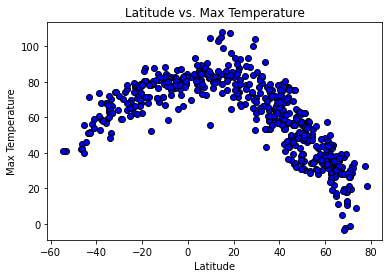

In [10]:
lat = weather_df['Lat']
temp = weather_df['Max Temp']

plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temperature')

plt.savefig("output_data/Lat_vs_Temp.png")

## Latitude vs. Humidity Plot

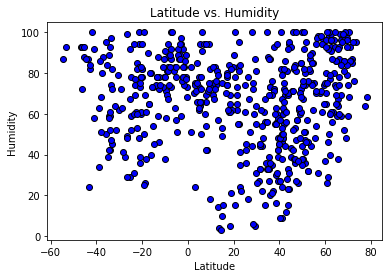

In [11]:
lat = weather_df['Lat']
humidity = weather_df['Humidity']

plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

plt.savefig("output_data/Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

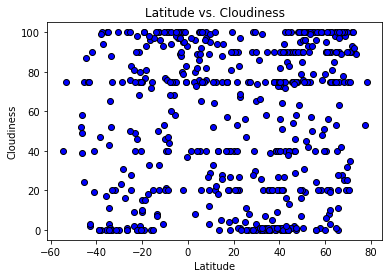

In [12]:
lat = weather_df['Lat']
cloudiness = weather_df['Cloudiness']

plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

plt.savefig("output_data/Lat_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

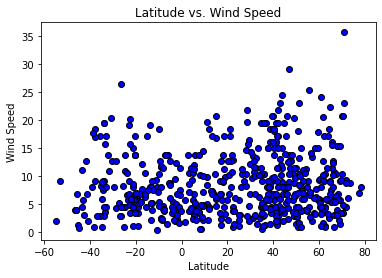

In [13]:
lat = weather_df['Lat']
wind_speed = weather_df['Wind Speed']

plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

plt.savefig("output_data/Lat_vs_Wind_Speed.png")

## Linear Regression

In [14]:
north_hem = weather_df.loc[weather_df['Lat'] >= 0]
south_hem = weather_df.loc[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere Latitude vs. Max Temperature Linear Regression')

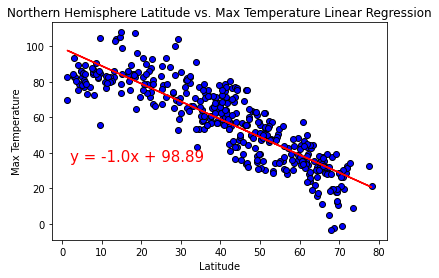

In [26]:
lat = north_hem['Lat']
temp = north_hem['Max Temp']

north_temp = north_hem.iloc[:, 3]
t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(lat, north_temp)
t_fit = t_slope * lat + t_int

plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black")
plt.plot(lat,t_fit,"-",color='red')
line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_int,2))
plt.annotate(line_eq,(2,35),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere Latitude vs. Max Temperature Linear Regression')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere Latitude vs. Max Temperature Linear Regression')

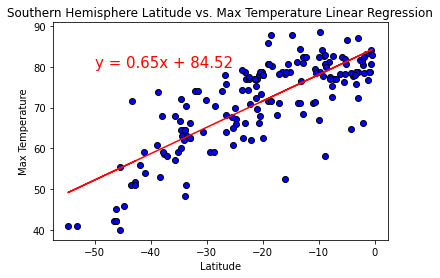

In [27]:
lat = south_hem['Lat']
temp = south_hem['Max Temp']

south_temp = south_hem.iloc[:, 3]
t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(lat, south_temp)
t_fit = t_slope * lat + t_int

plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black")
plt.plot(lat,t_fit,"-",color='red')
line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_int,2))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere Latitude vs. Max Temperature Linear Regression')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere Latitude vs. Humidity Linear Regression')

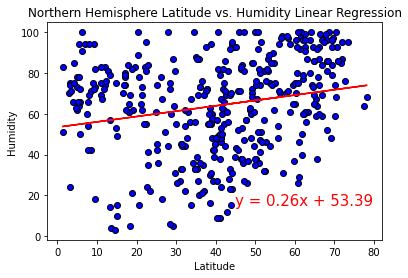

In [17]:
lat = north_hem['Lat']
humidity = north_hem['Humidity']

north_hum = north_hem.iloc[:, 4]
h_slope, h_int, h_r, h_p, h_std_err = stats.linregress(lat, north_hum)
h_fit = h_slope * lat + h_int

plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black")
plt.plot(lat,h_fit,"-",color='red')
line_eq = "y = " + str(round(h_slope,2)) + "x + " + str(round(h_int,2))
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Latitude vs. Humidity Linear Regression')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere Latitude vs. Humidity Linear Regression')

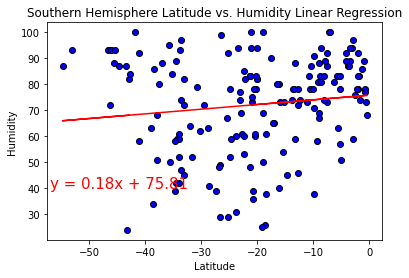

In [29]:
lat = south_hem['Lat']
humidity = south_hem['Humidity']

south_hum = south_hem.iloc[:, 4]
h_slope, h_int, h_r, h_p, h_std_err = stats.linregress(lat, south_hum)
h_fit = h_slope * lat + h_int

plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black")
plt.plot(lat,h_fit,"-",color='red')
line_eq = "y = " + str(round(h_slope,2)) + "x + " + str(round(h_int,2))
plt.annotate(line_eq,(-57,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Latitude vs. Humidity Linear Regression')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere Latitude vs. Cloudiness Linear Regression')

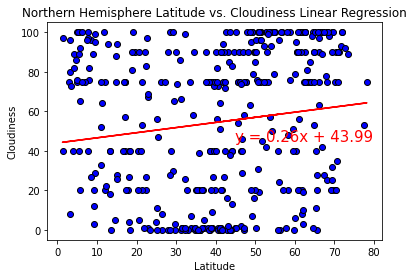

In [19]:
lat = north_hem['Lat']
cloudiness = north_hem['Cloudiness']

north_cloud = north_hem.iloc[:, 5]
c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(lat, north_cloud)
c_fit = c_slope * lat + c_int

plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black")
plt.plot(lat,c_fit,"-",color='red')
line_eq = "y = " + str(round(c_slope,2)) + "x + " + str(round(c_int,2))
plt.annotate(line_eq,(45,45),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude vs. Cloudiness Linear Regression')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere Latitude vs. Cloudiness Linear Regression')

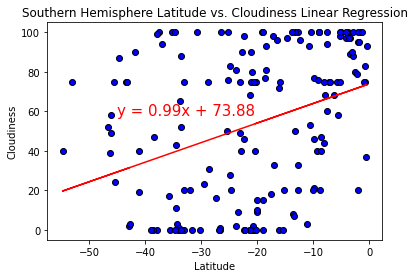

In [30]:
lat = south_hem['Lat']
cloudiness = south_hem['Cloudiness']

south_cloud = south_hem.iloc[:, 5]
c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(lat, south_cloud)
c_fit = c_slope * lat + c_int

plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black")
plt.plot(lat,c_fit,"-",color='red')
line_eq = "y = " + str(round(c_slope,2)) + "x + " + str(round(c_int,2))
plt.annotate(line_eq,(-45,58),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs. Cloudiness Linear Regression')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere Latitude vs. Wind Speed Linear Regression')

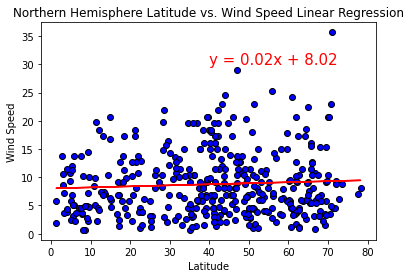

In [31]:
lat = north_hem['Lat']
wind_speed = north_hem['Wind Speed']

north_wind = north_hem.iloc[:, 6]
w_slope, w_int, w_r, w_p, w_std_err = stats.linregress(lat, north_wind)
w_fit = w_slope * lat + w_int

plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black")
plt.plot(lat,w_fit,"-",color='red')
line_eq = "y = " + str(round(w_slope,2)) + "x + " + str(round(w_int,2))
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude vs. Wind Speed Linear Regression')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere Latitude vs. Wind Speed Linear Regression')

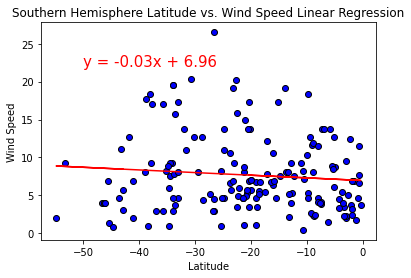

In [32]:
lat = south_hem['Lat']
wind_speed = south_hem['Wind Speed']

south_wind = south_hem.iloc[:, 6]
w_slope, w_int, w_r, w_p, w_std_err = stats.linregress(lat, south_wind)
w_fit = w_slope * lat + w_int

plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black")
plt.plot(lat,w_fit,"-",color='red')
line_eq = "y = " + str(round(w_slope,2)) + "x + " + str(round(w_int,2))
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude vs. Wind Speed Linear Regression')